(67, 3)
[[-1.    0.    0.  ]
 [-0.97  0.    0.  ]
 [-0.94  0.    0.  ]
 [-0.91  0.    0.  ]
 [-0.88  0.    0.  ]]
[0.       0.028227 0.053016 0.074529 0.092928]
(67, 3)
(67,)


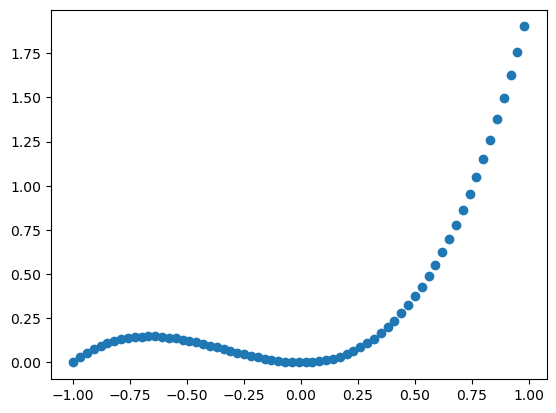

In [73]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
x1 = np.zeros((67, 3)) 
x1[:, 0]=np.arange(-1,1,0.03) 
 
print(x1.shape) 
y1=x1[:, 0]**3+x1[:, 0]**2 
print(x1[:5]) 
print(y1[:5]) 
plt.scatter(x1[:, 0],y1) 
x1[:, 1]=x1[:, 0]**2 
x1[:, 2]=x1[:, 0]**3 
# print(x1.head()) 
# print(y1.head()) 
# x1=x1.to_numpy() 
# y1=y1.to_numpy().T[0] 
print(x1.shape) 
print(y1.shape)

## Split Dataset:

In [74]:

X_train, X_test, y_train, y_test = train_test_split( x1, y1, test_size = 0.2)

## Gradient descent with L2 regularization function

In [75]:
def gradient_descent_L2(X, y, learning_rate, reg_lambda, n_iters):
    # Get the number of samples and features in the dataset
    n_samples, n_features = X.shape
    
    # Initialize the weights and bias to zeros
    w = np.zeros(n_features)
    b = 0

    # Perform gradient descent for the specified number of iterations
    for i in range(n_iters):
        # Calculate the linear model predictions
        linear_model = np.dot(X, w) + b
        y_predicted = linear_model
        
        # Calculate the L2 regularization term
        l2 = 2 * reg_lambda * np.sum(w)
        
        # Calculate the gradients of the weights and bias
        dw = (1 / n_samples) * (np.dot(X.T, (y_predicted - y)) + l2)
        db = (1 / n_samples) * np.sum(y_predicted - y)
        
        # Update the weights and bias using the learning rate and gradients
        w -= learning_rate * dw
        b -= learning_rate * db
         
        # Print the mean squared error loss every 1000 iterations
        if i % 1000 == 0:
            loss = MSE(y, y_predicted) * (0.5)
            print(f"Iteration {i}: MSE loss = {loss}")
        
    # Return the final weights and bias
    return w, b


## mean squared error (MSE) function

In [76]:
def MSE(y, y_pred):
    return np.mean((y - y_pred)**2)

In [77]:
def predict(X, w, b):
    predicts = np.dot(X, w.T) + b
    return predicts

In [78]:
w,b = gradient_descent_L2(X_train, y_train, 0.01, 1, 10000)

Iteration 0: MSE loss = 0.11041244657864258
Iteration 1000: MSE loss = 0.021124043377290447
Iteration 2000: MSE loss = 0.01867523628843218
Iteration 3000: MSE loss = 0.01804493294181717
Iteration 4000: MSE loss = 0.01791132898047818
Iteration 5000: MSE loss = 0.017927894529599857
Iteration 6000: MSE loss = 0.017985300283647317
Iteration 7000: MSE loss = 0.018048256159307448
Iteration 8000: MSE loss = 0.01810595274652502
Iteration 9000: MSE loss = 0.018155770743243288


In [79]:
pred = predict(X_test, w,b)

### Calculate the mean squared error (MSE)

In [80]:
mse = MSE(y_test, pred)
print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 0.1536349040922648


## Plot the result

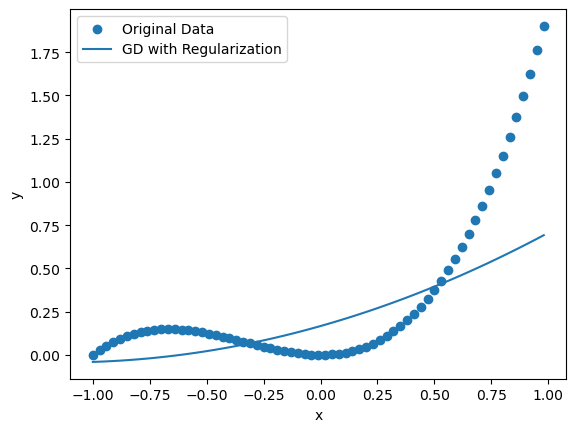

In [81]:
import numpy as np
import matplotlib.pyplot as plt

# Original Data
x1 = np.zeros((67, 3))
x1[:, 0] = np.arange(-1, 1, 0.03)
y1 = x1[:, 0]**3 + x1[:, 0]**2
plt.scatter(x1[:, 0], y1, label='Original Data')

x2 = np.zeros((67, 3))
x2[:, 0] = np.arange(-1, 1, 0.03)
y2 = ((x2[:, 0] * w[0]) + (x2[:, 0] * w[2])**3 + (x2[:, 0] * w[1])**2) + b

x2[:, 1] = x2[:, 0]**2
x2[:, 2] = x2[:, 0]**3
plt.plot(x2[:, 0], y2, label='GD with Regularization')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
